In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


In [8]:
df = pd.read_csv("Social_Network_Ads.csv")

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df.shape

(400, 5)

In [10]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [11]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [12]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

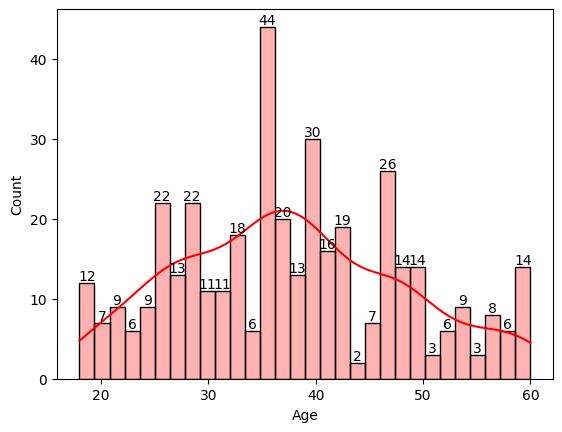

In [13]:
histplot = sns.histplot(df['Age'], kde=True, bins=30, color='red', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()

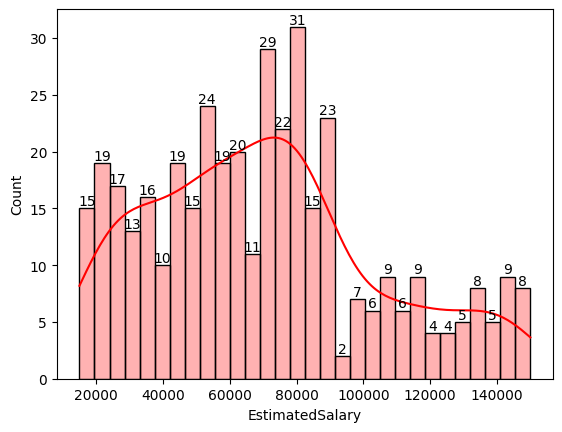

In [14]:
histplot = sns.histplot(df['EstimatedSalary'], kde=True, bins=30, color='red', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()

In [15]:
df["Gender"].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [16]:
def gender_encoder(value):
    if (value == "Male"):
        return 1
    elif (value == "Female"):
        return 0
    else:
        return -1

In [17]:
df["Gender"] = df["Gender"].apply(gender_encoder)

In [18]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [20]:
x = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

In [21]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [24]:
model = LogisticRegression(n_jobs=-1)

In [25]:

model.fit(x_train, y_train)

LogisticRegression(n_jobs=-1)

In [26]:
y_pred = model.predict(x_test)

In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  2]
 [ 9 19]]


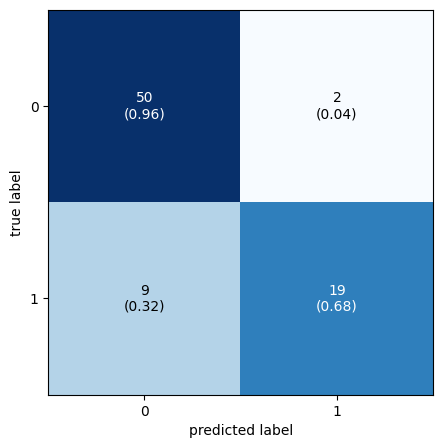

In [28]:
plot_confusion_matrix(conf_mat=cm, figsize=(5,5), show_normed=True)
plt.show()

In [29]:
print(f"TN value is {cm[0][0]}")
print(f"FP value is {cm[0][1]}")
print(f"FN value is {cm[1][0]}")
print(f"TP value is {cm[1][1]}")

TN value is 50
FP value is 2
FN value is 9
TP value is 19


In [30]:
print(f"Accuracy score is {accuracy_score(y_test, y_pred)}")

Accuracy score is 0.8625


In [31]:

print(f"Error rate is {1-accuracy_score(y_test, y_pred)}")

Error rate is 0.13749999999999996


In [32]:
print(f"Precision score is {precision_score(y_test, y_pred)}")

Precision score is 0.9047619047619048


In [33]:
print(f"Recall score is {recall_score(y_test, y_pred)}")

Recall score is 0.6785714285714286


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



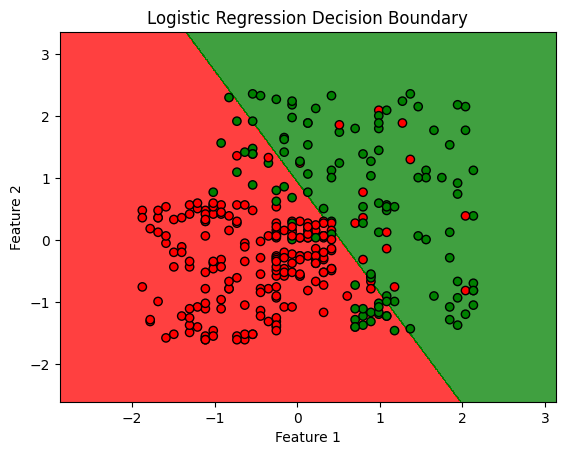

In [37]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.scatter(x_set[:, 0], x_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolors='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()